# Visualisation and analysis of World Health Organisation data

This notebook provides an example of data processing and visualisation. The data used was selected from freely available data on the World Health Organisation website, in the public health and environment section: https://apps.who.int/gho/data/node.main.ENVDALYSBYCOUNTRY?lang=en.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Exploring the burden of disease attributable to the environment (data by country)

In [5]:
# Ignore irrelevant warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [6]:
# Import pandas and numpy packages
import pandas as pd
import numpy as np

In [7]:
# Read HTML data file into dataframe
html_file = 'https://apps.who.int/gho/athena/data/GHO/TOTENV_3,TOTENV_4,TOTENV_6.html?profile=ztable&filter=COUNTRY:*;REGION:*;ENVCAUSE:ENVCAUSE000;ENVCAUSE:ENVCAUSE001;ENVCAUSE:ENVCAUSE060;ENVCAUSE:ENVCAUSE151&ead='
dfs = pd.read_html(html_file)
df = dfs[0]

In [8]:
# Check dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GHO                 1746 non-null   object 
 1   PUBLISHSTATE        1746 non-null   object 
 2   YEAR                1746 non-null   int64  
 3   REGION              1746 non-null   object 
 4   COUNTRY             1746 non-null   object 
 5   ENVCAUSE            1746 non-null   object 
 6   DISPLAY VALUE       1746 non-null   object 
 7   NUMERIC VALUE       1746 non-null   float64
 8   LOW RANGE           0 non-null      float64
 9   HIGH RANGE          0 non-null      float64
 10  STANDARD ERROR      0 non-null      float64
 11  STANDARD DEVIATION  0 non-null      float64
 12  Comment             0 non-null      float64
dtypes: float64(6), int64(1), object(6)
memory usage: 177.5+ KB


In [9]:
# Clean up data - reconfigure structure, filter by two columns & sort by country name
new_df = df['GHO'], df['YEAR'], df['REGION'], df['COUNTRY'], df['ENVCAUSE'], df['DISPLAY VALUE'], df['NUMERIC VALUE'] # Reconfigure structure excluding 6 columns
tbdf = pd.DataFrame(new_df)
trans_df = tbdf.transpose()
dalys = trans_df['GHO']
Envcause = trans_df['ENVCAUSE']
filtered_df = trans_df[(dalys == 'Age-standardized DALYs attributable to the environment (per 100 000 population)') & (Envcause == 'Total')] # Filter by result and total cause
sorted_df = filtered_df.sort_values(by ='COUNTRY') # Sort values in dataframe alphabetically by country 

In [10]:
# Import data visualisation packages
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
# Load in map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world['COUNTRY'] = world['name']
merged = world.merge(filtered_df, how='outer', on='COUNTRY') # Merge datasets for the world plot and the WHO data

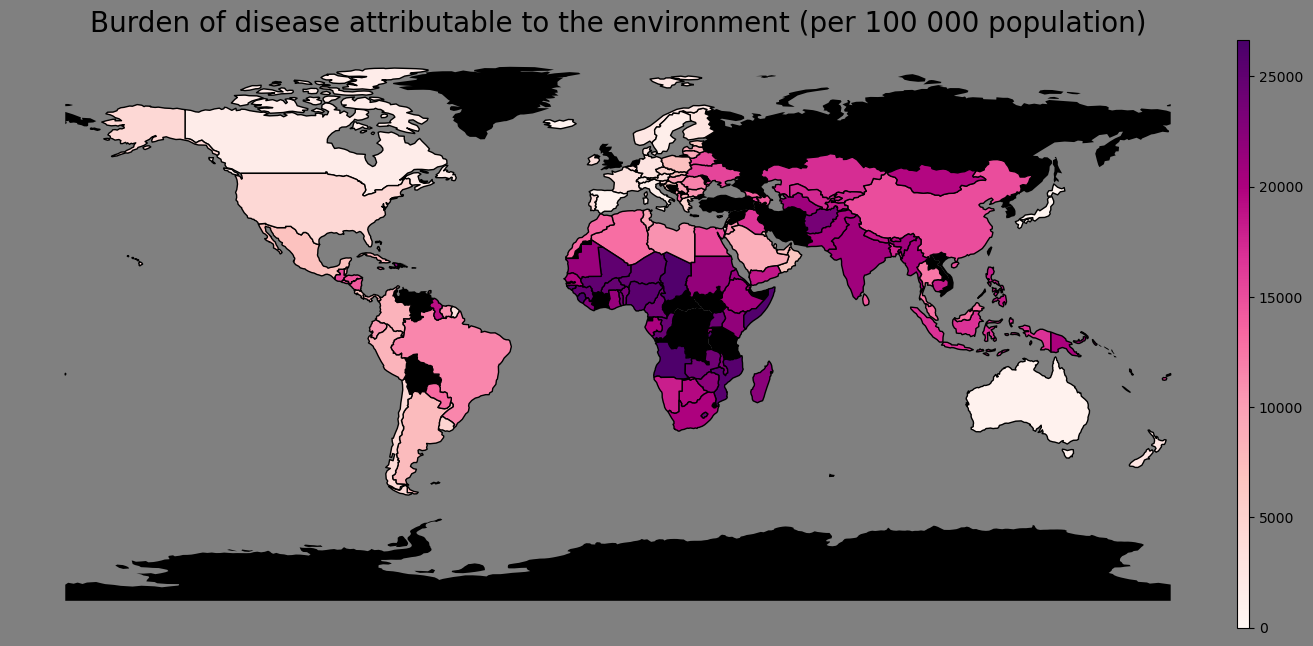

In [12]:
# Plot WHO data on world map - total per each country
from mpl_toolkits.axes_grid1 import make_axes_locatable 
fig, ax = plt.subplots(1, figsize =(16, 12), facecolor ='grey') 
merged.plot(ax = ax, color ='black') 
merged.plot(ax = ax, column = 'NUMERIC VALUE', cmap ='RdPu', edgecolors ='black') 
plt.title("Burden of disease attributable to the environment (per 100 000 population)", loc='center', size=20)
# Define the axis for colour bar 
divide = make_axes_locatable(ax) 
position = divide.append_axes("right", size ="1 %", pad = 0.1) 
# Define the colour bar 
barmax = merged['NUMERIC VALUE'].max() 
mappable = plt.cm.ScalarMappable(cmap ='RdPu', norm = plt.Normalize(vmin = 0, vmax = barmax)) 
colorbar = fig.colorbar(mappable, position) 
ax.axis('off') 
plt.show() 

### Heatmap results

The first resullting plot shows a heatmap of the sample data of age-standardized disability-adjusted life years (DALYs) attributable to the environment (per 100,000 population). This can be analysed as the burden of disease attributable to the current state of that country's environment.

The countries with the highest DALYs per 100,000 people are shown in purple, and countries with the lowest DALYs are shown in white. Where no data is available for a country, this is shown in black.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Exploring the statistics of each disease category

In [17]:
# Restructure original WHO data to exclude the year column & 'total' from the envcause colummn
new_df = pd.DataFrame(new_df)
new_df = np.transpose(new_df)
newdf = new_df['GHO'], new_df['REGION'], new_df['COUNTRY'], new_df['ENVCAUSE'], new_df['DISPLAY VALUE'], new_df['NUMERIC VALUE']
newdf = pd.DataFrame(newdf)
newdf = np.transpose(newdf)
envcause = newdf['ENVCAUSE']
newdf = newdf[(envcause != 'Total')]

In [18]:

newdf = newdf[(newdf['NUMERIC VALUE']<10000) & (newdf['GHO']=='Age-standardized DALYs attributable to the environment (per 100 000 population)')]
newdf

,GHO,REGION,COUNTRY,ENVCAUSE,DISPLAY VALUE,NUMERIC VALUE
0,Age-standardized DALYs attributable to the env...,Africa,Cameroon,"Infectious, parasitic, neonatal and nutritional",8 659,8659.37461
1,Age-standardized DALYs attributable to the env...,Europe,Cyprus,"Infectious, parasitic, neonatal and nutritional",50,50.14587
2,Age-standardized DALYs attributable to the env...,Europe,Czechia,"Infectious, parasitic, neonatal and nutritional",80,80.16813
3,Age-standardized DALYs attributable to the env...,Europe,Greece,"Infectious, parasitic, neonatal and nutritional",73,73.27666
4,Age-standardized DALYs attributable to the env...,Americas,Saint Lucia,"Infectious, parasitic, neonatal and nutritional",420,419.56619
...,...,...,...,...,...,...
1496,Age-standardized DALYs attributable to the env...,Europe,Estonia,Noncommunicable diseases,2 901,2900.78095
1497,Age-standardized DALYs attributable to the env...,Europe,United Kingdom of Great Britain and Northern I...,Noncommunicable diseases,2 293,2292.83792
1498,Age-standardized DALYs attributable to the env...,Eastern Mediterranean,Kuwait,Noncommunicable diseases,2 561,2561.27305
1499,Age-standardized DALYs attributable to the env...,Europe,Luxembourg,Noncommunicable diseases,1 943,1942.64198


Text(0, 0.5, 'Age-standardized DALYs (per 100 000 population)')

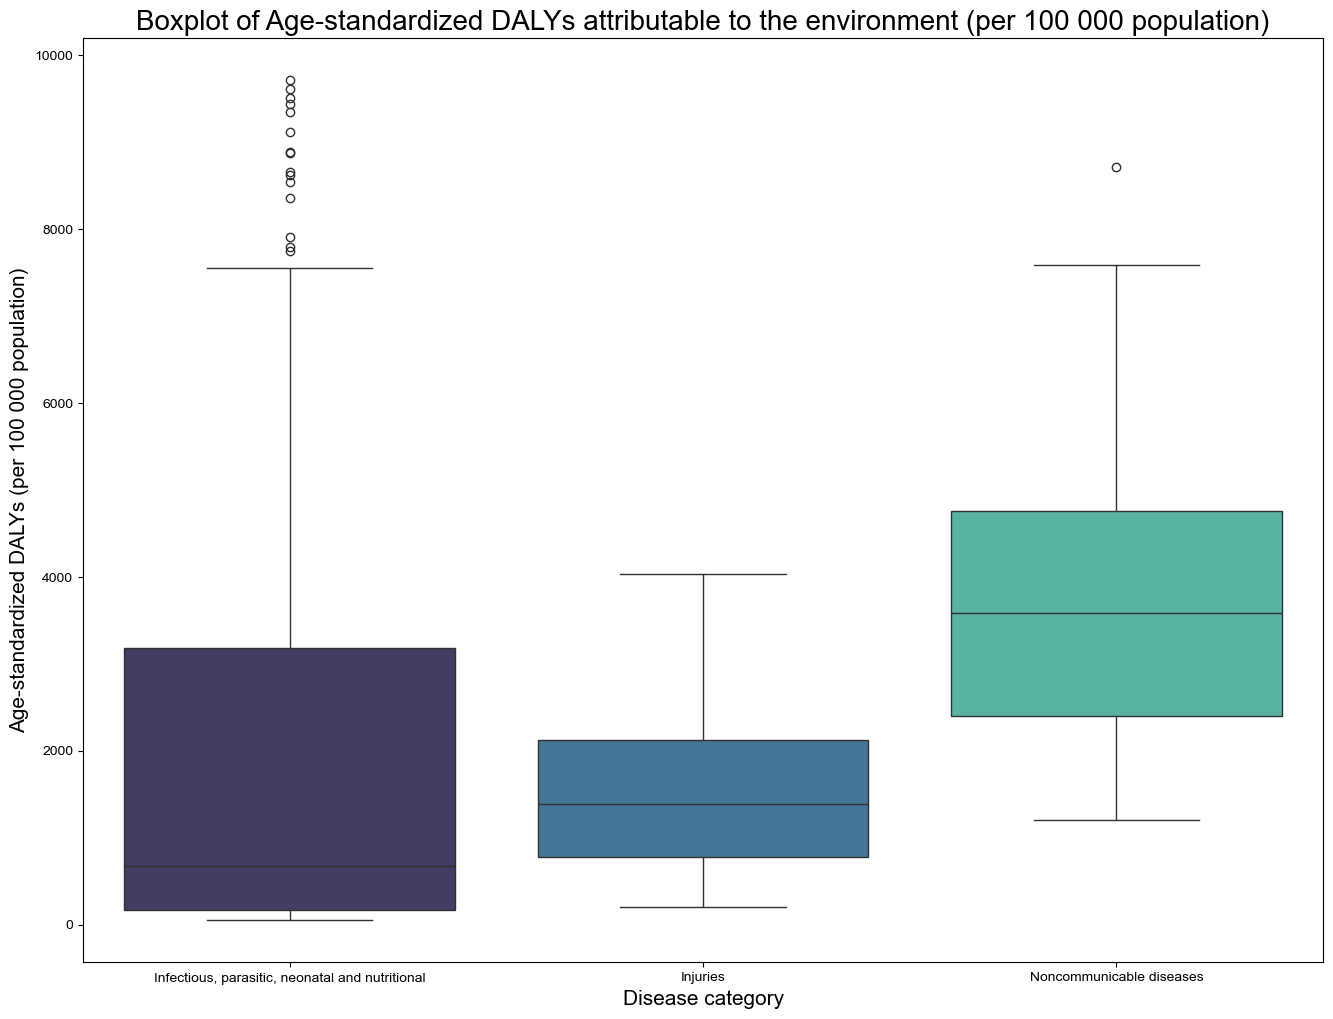

In [19]:
fig, ax = plt.subplots(figsize =(16, 12))
sns.boxplot(x = 'ENVCAUSE', y = 'NUMERIC VALUE', data = newdf, palette='mako')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.title('Boxplot of Age-standardized DALYs attributable to the environment (per 100 000 population)', size=20)
plt.xlabel('Disease category', size=15)
plt.ylabel('Age-standardized DALYs (per 100 000 population)', size=15)

### Boxplot results

In this second results plot, the values of age-standardized DALYs (per 100,000) are plotted in a boxplot according to each disease category responsible. 

The minimum, first quartile, median, and third quartile values for both "injuries" and "infectious, parasitic, neonatal and nutritional" do not show a great degree of difference - this is especially true when comparaing with the maximum value of "infectious, parasitic, neonatal and nutritional disease", and all statistical values for noncommunicable disease. 

The "injuries" category appears to have the lowest data values, and therefore accounts for the smallest portion of the overall DALYs total. The data for "noncommunicable" diseases appears to have a relatively uniform spread of values, while most of the data for "infectious, parasitic, neonatal and nutritional" lies within the third quartile boundaryimum

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Disease categories by region

In [24]:
# Define variables for each parameter to be plotted in a lineplot
linevalues = new_df['NUMERIC VALUE']
lineregion = new_df['REGION']
lineinfect = new_df[(new_df['ENVCAUSE'] == 'Infectious, parasitic, neonatal and nutritional')]
linenoncomm = new_df[(new_df['ENVCAUSE'] == 'Noncommunicable diseases')]
lineinjuries = new_df[(new_df['ENVCAUSE'] == 'Injuries')]
line_df = trans_df[(dalys == 'Age-standardized DALYs attributable to the environment (per 100 000 population)') & (Envcause != 'Total')] # Filter 

In [25]:
# Reload and merge world and WHO data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world['COUNTRY'] = world['name']
linemerge = world.merge(line_df, how='outer', on='COUNTRY') # Merge datasets for the world plot and the WHO data
linemerge = linemerge.dropna(how='any',axis=0)
linemerge = pd.DataFrame(linemerge)

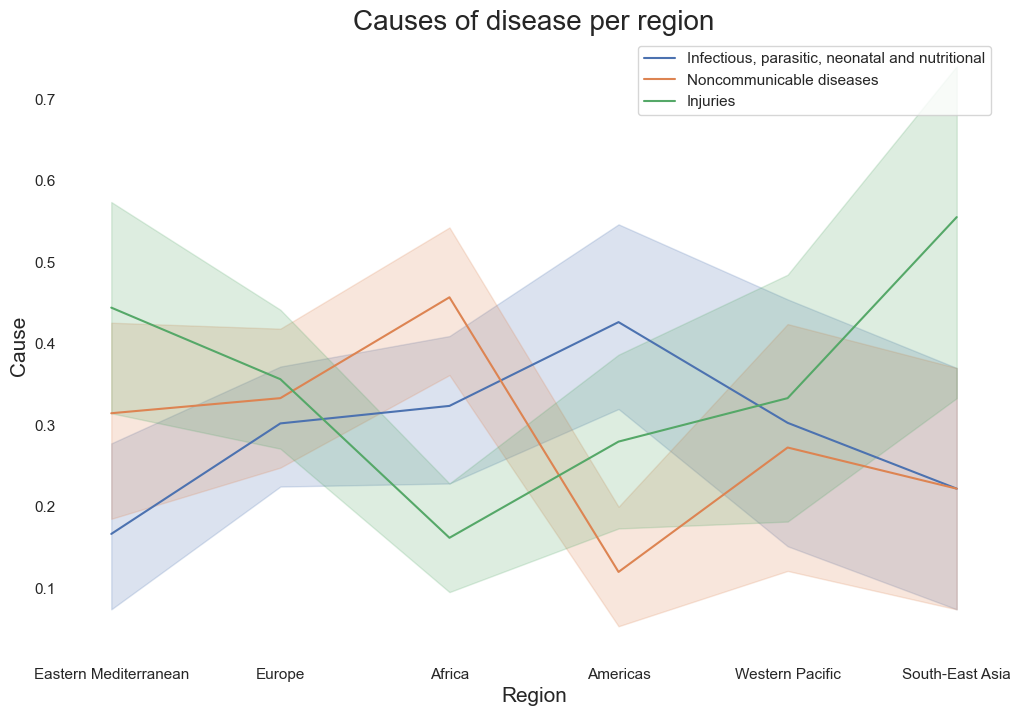

In [26]:
# Define columns of data in the new linemerge dataframe ready for plotting
linemerge['lineinfect'] = new_df['ENVCAUSE'] == 'Infectious, parasitic, neonatal and nutritional'
linemerge['linenoncomm'] = new_df['ENVCAUSE'] == 'Noncommunicable diseases'
linemerge['lineinjuries'] = new_df['ENVCAUSE'] == 'Injuries'

# Create lineplot of data for each disease type
plt.figure(figsize=(12,8))
sns.lineplot(data=linemerge, x='REGION', y='lineinfect', label='Infectious, parasitic, neonatal and nutritional')
sns.lineplot(data=linemerge, x='REGION', y='linenoncomm', label='Noncommunicable diseases')
sns.lineplot(data=linemerge, x='REGION', y='lineinjuries', label='Injuries')
plt.title('Causes of disease per region', size=20)
plt.ylabel('Cause', size=15)
plt.xlabel('Region', size=15)
plt.legend()
plt.show()

### Lineplot results

The final sample data plot shows the DALYs values recorded for each disease category, their prevalence in each region, and shadow areas illustrating error margins.

This allows the prevalence of each disease category to be easily identifed in each region. "Infectious, parasitic, neonatal and nutritional" disease is most prevalent in the Americas, "Noncommunicable" disease is highest in Africa, and "injuries" are highest in South-East Asia.

--------------------------------------------------------------------------------------------------------------------------------------------------------